Epoch 1/200


C:\Users\Sanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3859.4541  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1329.0454 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544.1489 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.3149 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.2200
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.3627  
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.2289 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.7309 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8115 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7677 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3079 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6199 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0149 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1011 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5853 
Epoch 16/200
4/

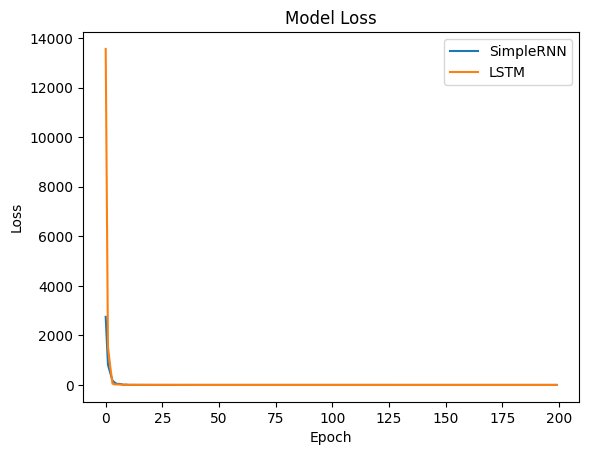

SimpleRNN Predictions:
Expected: 10, Predicted: 9.906064987182617
Expected: 11, Predicted: 10.906423568725586
Expected: 12, Predicted: 11.908761978149414
Expected: 13, Predicted: 12.91064167022705
Expected: 14, Predicted: 13.912612915039062
Expected: 15, Predicted: 14.914650917053223
Expected: 16, Predicted: 15.916688919067383
Expected: 17, Predicted: 16.918684005737305
Expected: 18, Predicted: 17.920166015625
Expected: 19, Predicted: 18.92164421081543

LSTM Predictions:
Expected: 10, Predicted: 9.912943840026855
Expected: 11, Predicted: 10.989301681518555
Expected: 12, Predicted: 12.022517204284668
Expected: 13, Predicted: 12.981511116027832
Expected: 14, Predicted: 13.946250915527344
Expected: 15, Predicted: 14.924752235412598
Expected: 16, Predicted: 15.976696968078613
Expected: 17, Predicted: 16.984525680541992
Expected: 18, Predicted: 17.968517303466797
Expected: 19, Predicted: 18.944528579711914


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def create_sequence(n_timesteps):
    X = np.array([[i+j for j in range(n_timesteps)] for i in range(100)])
    y = np.array([i+n_timesteps for i in range(100)])
    return X, y

n_timesteps = 10
X, y = create_sequence(n_timesteps)

X = X.reshape((X.shape[0], X.shape[1], 1))

rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(n_timesteps, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

rnn_history = rnn_model.fit(X, y, epochs=200, verbose=1)

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_timesteps, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

lstm_history = lstm_model.fit(X, y, epochs=200, verbose=1)

plt.plot(rnn_history.history['loss'], label='SimpleRNN')
plt.plot(lstm_history.history['loss'], label='LSTM')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

X_test, y_test = create_sequence(n_timesteps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

y_pred_rnn = rnn_model.predict(X_test, verbose=0)
y_pred_lstm = lstm_model.predict(X_test, verbose=0)

print("SimpleRNN Predictions:")
for i in range(10):
    print(f"Expected: {y_test[i]}, Predicted: {y_pred_rnn[i][0]}")

print("\nLSTM Predictions:")
for i in range(10):
    print(f"Expected: {y_test[i]}, Predicted: {y_pred_lstm[i][0]}")